In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [97]:
data = pd.read_csv('HousePricePrediction.xlsx - Sheet1.csv')

In [98]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [99]:
data.shape

(2919, 13)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [101]:
obj = (data.dtypes == 'object')
obj = list(obj)
obj

[False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False]

# calculate the number of Categorical , interger and float features of this data

In [102]:
obj = data.columns[data.dtypes == 'object']
int_ = data.columns[data.dtypes == 'int64']
float_ = data.columns[data.dtypes == 'float64']

print('=='*12)
print(f'Categorical features : {len(obj)} ')
print('=='*10)
print(f'Integer features : {len(int_)} ')
print('=='*9)
print(f'Float features : {len(float_)} ')
obj

Categorical features : 4 
Integer features : 6 
Float features : 3 


Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')

# EDA

<Axes: >

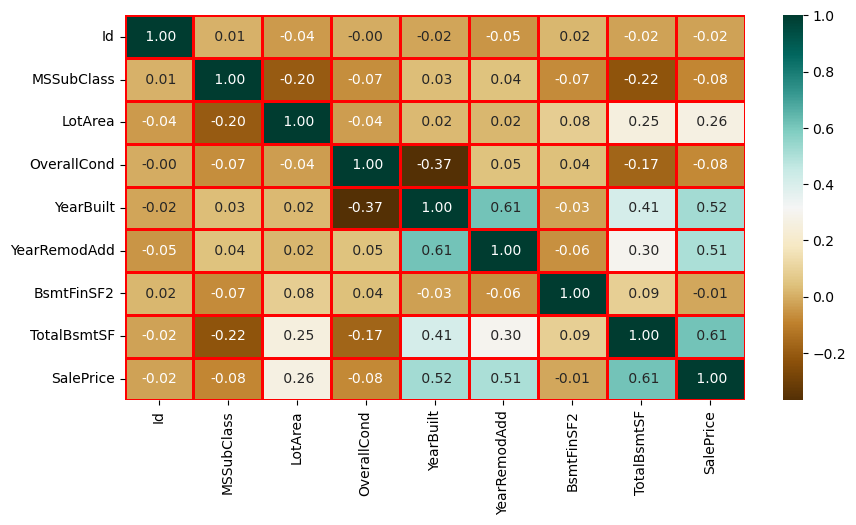

In [103]:
d = data.drop(columns = obj)
plt.figure(figsize = (10, 5))
sns.heatmap(d.corr(), annot = True, fmt = ' .2f', linecolor='red', linewidths=2, cmap = 'BrBG')

# plot the number of categorical features

<Axes: >

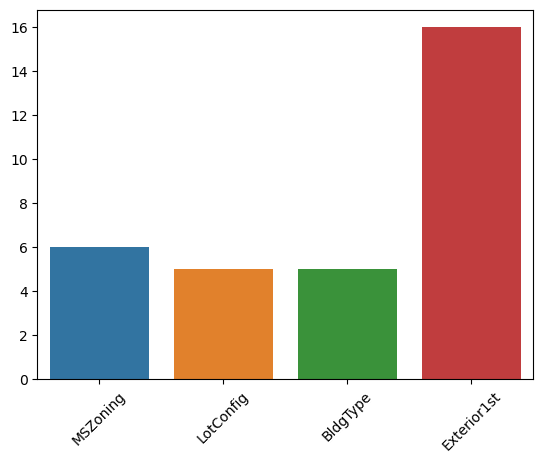

In [104]:
unique_values = []
for i in obj:
    unique_values.append(data[i].unique().size)  
plt.xticks(rotation = 45)
sns.barplot(x = obj, y = unique_values)

In [105]:
unique_values

[6, 5, 5, 16]

In [106]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [107]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].value_counts().idxmax())
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].value_counts().idxmax())
data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(np.mean(data['BsmtFinSF2']))
data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(np.mean(data['TotalBsmtSF']))
data['SalePrice'] = data['SalePrice'].fillna(np.mean(data['SalePrice']))

# plot each of them seperately and see how many unqiue values does they have

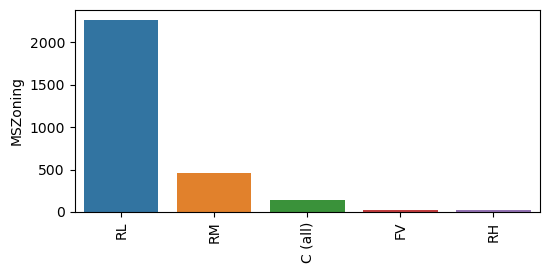

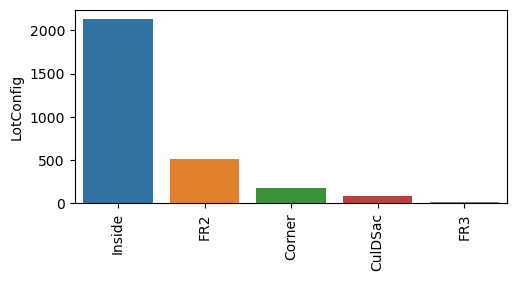

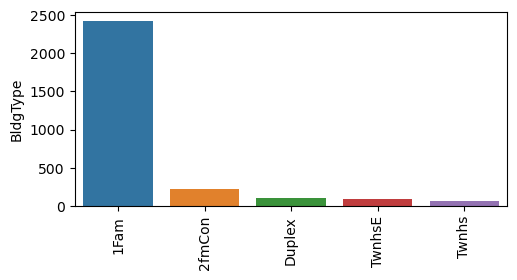

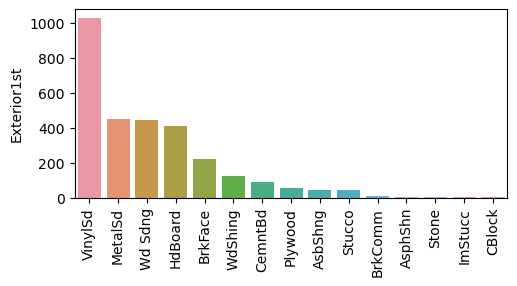

In [108]:
index = 1
for i in obj:
    plt.figure(figsize = (20, 5))
    plt.subplot(2,4,index)
    plt.xticks(rotation = 90)
    sns.barplot(data = data, x = data[i].unique(), y = data[i].value_counts())
    plt.tight_layout()
    plt.ylabel(i)
    plt.show()
    index += 1

In [109]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [110]:
# data['building time'] = data['YearRemodAdd'] - data['YearBuilt']

# How much time does it make to complete the entire House

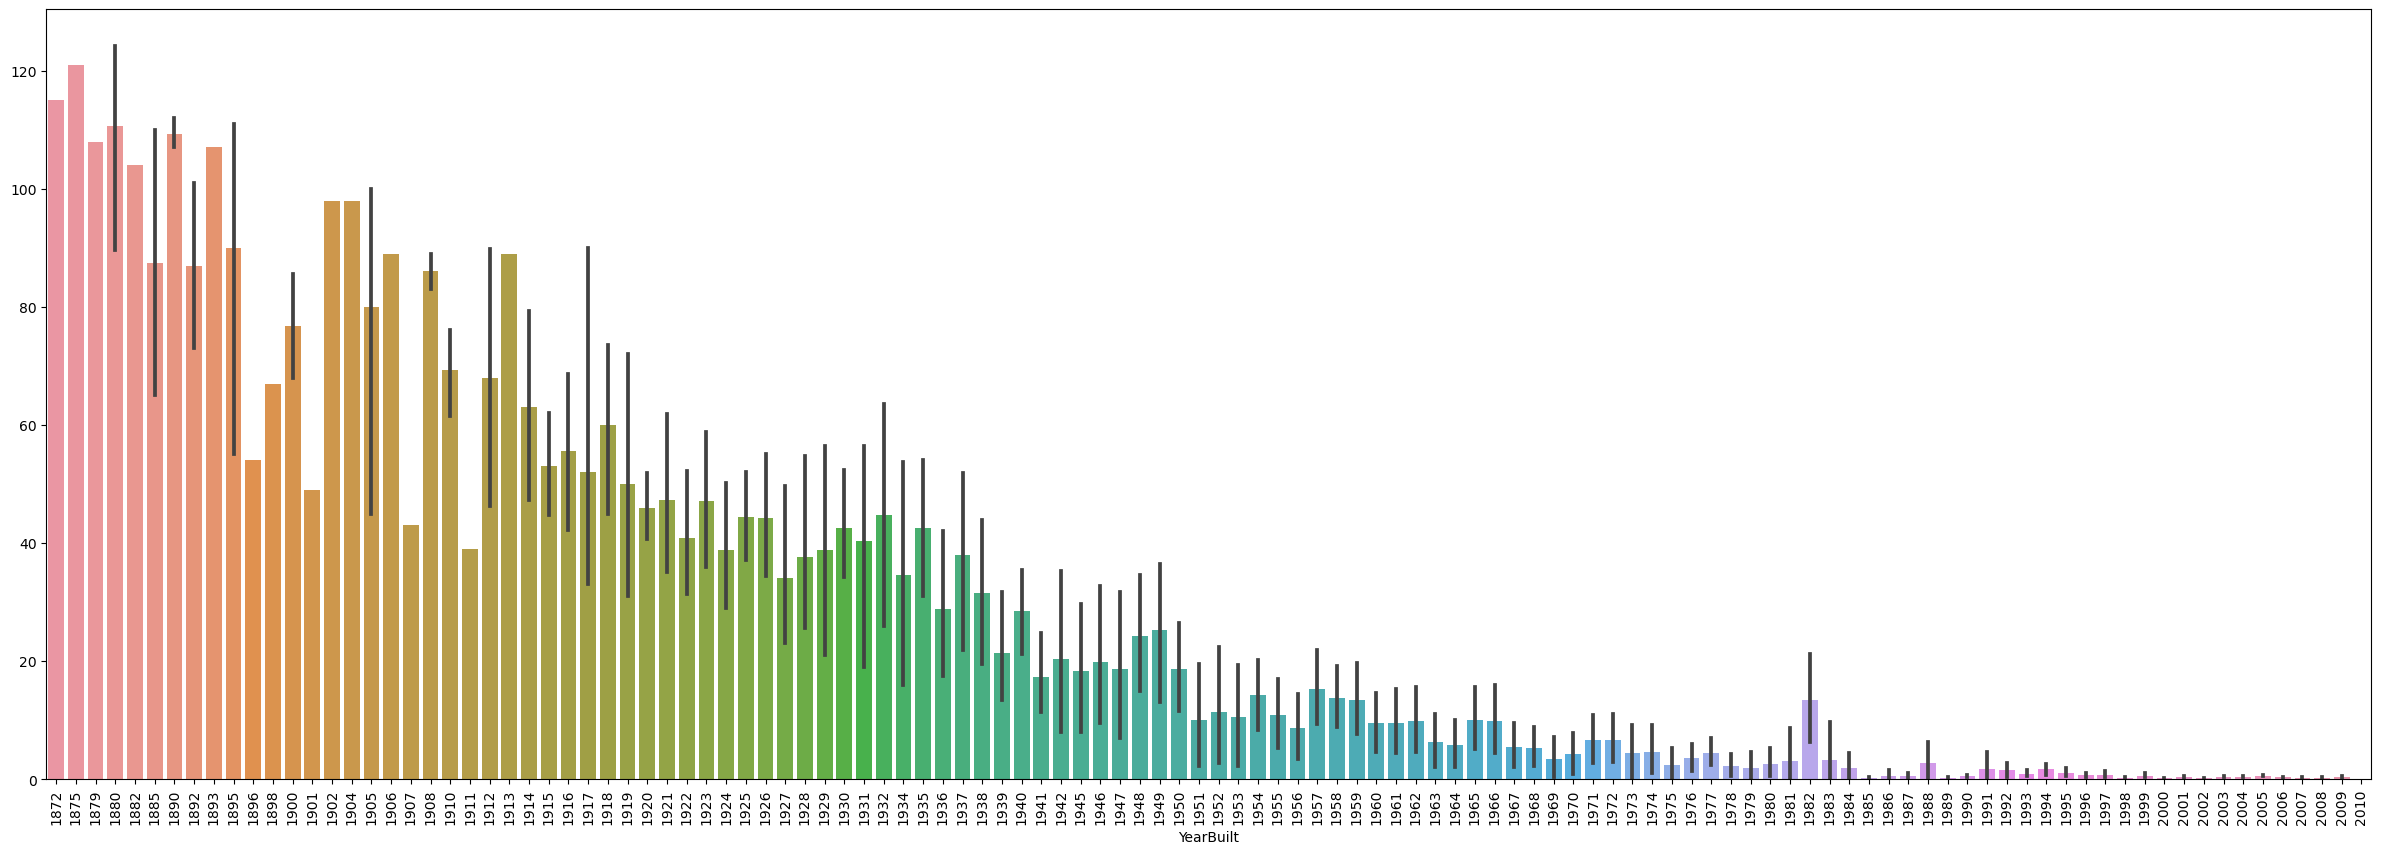

In [111]:
plt.figure(figsize = (30, 10))
sns.barplot(x = 'YearBuilt', y = data['YearRemodAdd'] - data['YearBuilt'] , data = data)
plt.xticks(rotation = 90)
plt.show()

# Data Cleaning


In [112]:
data.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

<Axes: >

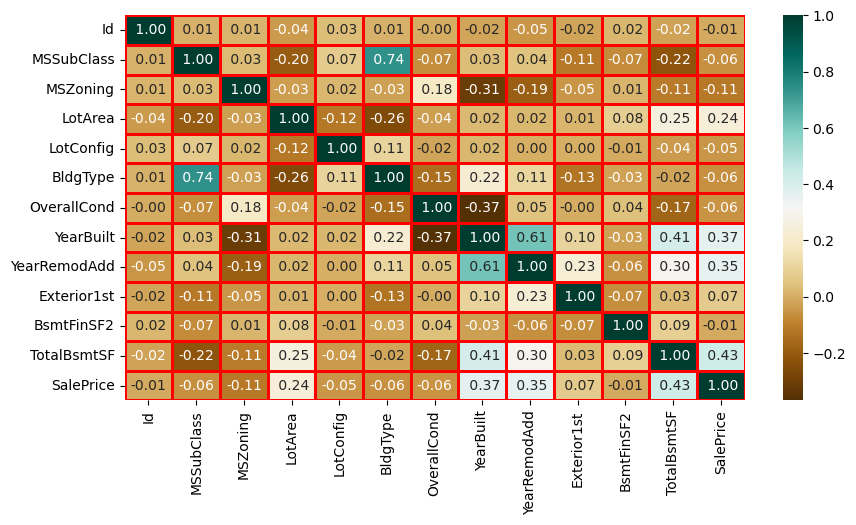

In [117]:
plt.figure(figsize = (10, 5))
sns.heatmap(data.corr(), annot = True, fmt = ' .2f', linecolor='red', linewidths=2, cmap = 'BrBG')

In [119]:
data = data.drop(columns = ['Id', 'BsmtFinSF2', 'OverallCond', 'BldgType', 'LotConfig' ,'MSSubClass','MSZoning'])
data.head()

,LotArea,YearBuilt,YearRemodAdd,Exterior1st,TotalBsmtSF,SalePrice
0,8450,2003,2003,12,856.0,208500.0
1,9600,1976,1976,8,1262.0,181500.0
2,11250,2001,2002,12,920.0,223500.0
3,9550,1915,1970,13,756.0,140000.0
4,14260,2000,2000,12,1145.0,250000.0


In [120]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder

LabelEncoder()

In [122]:
for i in obj:
    data[i] = encoder.fit_transform(data[i])

In [123]:
data.head()

,LotArea,YearBuilt,YearRemodAdd,Exterior1st,TotalBsmtSF,SalePrice
0,8450,2003,2003,12,856.0,208500.0
1,9600,1976,1976,8,1262.0,181500.0
2,11250,2001,2002,12,920.0,223500.0
3,9550,1915,1970,13,756.0,140000.0
4,14260,2000,2000,12,1145.0,250000.0


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = data.drop(['SalePrice'], axis = 1)
Y = data['SalePrice']

x_train, x_test , y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# SVM Model

In [125]:
from sklearn import svm
from sklearn.metrics import mean_absolute_percentage_error

svr_model = svm.SVR()

svr_model.fit(x_train, y_train)

svm_prediction = svr_model.predict(x_test)

print("-"*52)
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, svm_prediction)}")
print("-"*52)


----------------------------------------------------
mean_absolute_percentage_error : 0.19896164120405294
----------------------------------------------------


# Random Forest Model

In [126]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(x_train, y_train)
random_forest_prediction = random_forest_model.predict(x_test)

print("-"*52)
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, random_forest_prediction)}")
print("-"*52)

----------------------------------------------------
mean_absolute_percentage_error : 0.20857086080493806
----------------------------------------------------


# Linear Regression Model

In [127]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
linear_prediction = model.predict(x_test)

print("-"*52)
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, linear_prediction)}")
print("-"*52)

----------------------------------------------------
mean_absolute_percentage_error : 0.19686368446538846
----------------------------------------------------


In [128]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
cb_model = CatBoostRegressor()
cb_model.fit(x_train, y_train)
cat_boost_prediction = cb_model.predict(x_test) 

Learning rate set to 0.046813
0:	learn: 54466.3472998	total: 2.34ms	remaining: 2.34s
1:	learn: 53814.0014023	total: 4.67ms	remaining: 2.33s
2:	learn: 53187.0950227	total: 7ms	remaining: 2.33s
3:	learn: 52605.7371672	total: 8.54ms	remaining: 2.13s
4:	learn: 52055.7683676	total: 10ms	remaining: 1.99s
5:	learn: 51513.3785175	total: 11.4ms	remaining: 1.89s
6:	learn: 51055.2074638	total: 12.9ms	remaining: 1.83s
7:	learn: 50615.5989038	total: 14.5ms	remaining: 1.79s
8:	learn: 50168.1519259	total: 16ms	remaining: 1.76s
9:	learn: 49775.8467091	total: 17.5ms	remaining: 1.73s
10:	learn: 49396.6375646	total: 19.1ms	remaining: 1.72s
11:	learn: 49061.1019210	total: 20.5ms	remaining: 1.69s
12:	learn: 48728.6586638	total: 22.3ms	remaining: 1.7s
13:	learn: 48425.7770334	total: 24ms	remaining: 1.69s
14:	learn: 48167.9284281	total: 25.5ms	remaining: 1.68s
15:	learn: 47892.2198188	total: 26.9ms	remaining: 1.66s
16:	learn: 47628.3187752	total: 28.5ms	remaining: 1.65s
17:	learn: 47368.9409151	total: 30.2ms

209:	learn: 36900.2728525	total: 347ms	remaining: 1.3s
210:	learn: 36875.2182956	total: 349ms	remaining: 1.3s
211:	learn: 36854.7284703	total: 351ms	remaining: 1.3s
212:	learn: 36841.0386222	total: 352ms	remaining: 1.3s
213:	learn: 36820.0940452	total: 354ms	remaining: 1.3s
214:	learn: 36797.3218770	total: 356ms	remaining: 1.3s
215:	learn: 36763.5418204	total: 357ms	remaining: 1.3s
216:	learn: 36737.5654778	total: 359ms	remaining: 1.29s
217:	learn: 36720.5027381	total: 361ms	remaining: 1.29s
218:	learn: 36693.7727653	total: 363ms	remaining: 1.29s
219:	learn: 36673.4506651	total: 365ms	remaining: 1.29s
220:	learn: 36657.5128832	total: 368ms	remaining: 1.29s
221:	learn: 36608.0691085	total: 369ms	remaining: 1.29s
222:	learn: 36576.7996709	total: 371ms	remaining: 1.29s
223:	learn: 36555.1324805	total: 372ms	remaining: 1.29s
224:	learn: 36530.1361912	total: 374ms	remaining: 1.29s
225:	learn: 36514.6414730	total: 376ms	remaining: 1.29s
226:	learn: 36466.0138536	total: 378ms	remaining: 1.29s

430:	learn: 32780.5281506	total: 710ms	remaining: 937ms
431:	learn: 32773.1770771	total: 712ms	remaining: 936ms
432:	learn: 32756.3347447	total: 713ms	remaining: 934ms
433:	learn: 32741.8554873	total: 715ms	remaining: 932ms
434:	learn: 32729.4430305	total: 717ms	remaining: 931ms
435:	learn: 32703.4501313	total: 747ms	remaining: 966ms
436:	learn: 32697.1659156	total: 756ms	remaining: 974ms
437:	learn: 32678.3295092	total: 759ms	remaining: 974ms
438:	learn: 32666.2909210	total: 761ms	remaining: 973ms
439:	learn: 32652.0904730	total: 764ms	remaining: 973ms
440:	learn: 32640.0587658	total: 766ms	remaining: 971ms
441:	learn: 32625.9249043	total: 767ms	remaining: 969ms
442:	learn: 32615.2330846	total: 769ms	remaining: 967ms
443:	learn: 32603.8111787	total: 770ms	remaining: 965ms
444:	learn: 32597.9990303	total: 772ms	remaining: 963ms
445:	learn: 32588.1788087	total: 774ms	remaining: 961ms
446:	learn: 32566.2287666	total: 776ms	remaining: 959ms
447:	learn: 32537.9601903	total: 777ms	remaining

645:	learn: 29752.0430104	total: 1.09s	remaining: 596ms
646:	learn: 29735.1445297	total: 1.09s	remaining: 594ms
647:	learn: 29725.7889118	total: 1.09s	remaining: 592ms
648:	learn: 29719.4593084	total: 1.09s	remaining: 591ms
649:	learn: 29708.6157275	total: 1.09s	remaining: 589ms
650:	learn: 29680.6695965	total: 1.09s	remaining: 587ms
651:	learn: 29675.5541159	total: 1.1s	remaining: 586ms
652:	learn: 29664.9377561	total: 1.1s	remaining: 584ms
653:	learn: 29645.9210626	total: 1.1s	remaining: 584ms
654:	learn: 29627.5070182	total: 1.1s	remaining: 582ms
655:	learn: 29618.6181004	total: 1.11s	remaining: 580ms
656:	learn: 29604.9220599	total: 1.11s	remaining: 579ms
657:	learn: 29594.7999816	total: 1.11s	remaining: 577ms
658:	learn: 29577.9377770	total: 1.11s	remaining: 575ms
659:	learn: 29563.2672673	total: 1.11s	remaining: 574ms
660:	learn: 29551.5049784	total: 1.11s	remaining: 572ms
661:	learn: 29544.3571899	total: 1.12s	remaining: 570ms
662:	learn: 29533.1467613	total: 1.12s	remaining: 56

880:	learn: 27173.9806857	total: 1.47s	remaining: 199ms
881:	learn: 27166.9390874	total: 1.47s	remaining: 197ms
882:	learn: 27162.2316023	total: 1.48s	remaining: 195ms
883:	learn: 27150.0775012	total: 1.48s	remaining: 194ms
884:	learn: 27139.5247722	total: 1.48s	remaining: 192ms
885:	learn: 27127.5367014	total: 1.48s	remaining: 190ms
886:	learn: 27121.0403496	total: 1.48s	remaining: 189ms
887:	learn: 27115.3212708	total: 1.48s	remaining: 187ms
888:	learn: 27109.5415203	total: 1.49s	remaining: 186ms
889:	learn: 27096.6805941	total: 1.49s	remaining: 184ms
890:	learn: 27086.2351937	total: 1.49s	remaining: 182ms
891:	learn: 27080.9561205	total: 1.49s	remaining: 181ms
892:	learn: 27074.2189337	total: 1.49s	remaining: 179ms
893:	learn: 27067.4781901	total: 1.5s	remaining: 177ms
894:	learn: 27061.5778773	total: 1.5s	remaining: 176ms
895:	learn: 27055.1285355	total: 1.5s	remaining: 174ms
896:	learn: 27050.2526413	total: 1.5s	remaining: 172ms
897:	learn: 27036.2710274	total: 1.5s	remaining: 171

In [129]:
print("-"*52)
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, cat_boost_prediction)}")
print("-"*52) 

----------------------------------------------------
mean_absolute_percentage_error : 0.20531111656930862
----------------------------------------------------


In [130]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

tree_prediction = tree.predict(x_test)

print("-"*52)
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, tree_prediction)}")
print("-"*52) 

----------------------------------------------------
mean_absolute_percentage_error : 0.2472903514381255
----------------------------------------------------


# so from above observations we can clearly say that our model is perfoming good on Linear regression 

1. so we can procedd further with this model itself

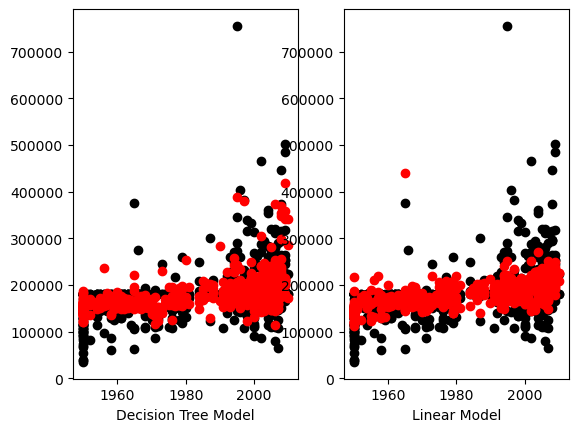

In [141]:
plt.subplot(1,2,1)
plt.scatter(x_test.iloc[:, 2], y_test, c = 'black')
plt.scatter(x_test.iloc[:, 2], cat_boost_prediction , c = 'red')
plt.xlabel('Decision Tree Model')

plt.subplot(1,2,2)
plt.scatter(x_test.iloc[:, 2], y_test, c = 'black')
plt.scatter(x_test.iloc[:, 2], linear_prediction , c = 'red')
plt.xlabel('Linear Model')
plt.show()

In [132]:
def r2_score(y_t, y_p):
    num = np.sum((y_t - y_p)**2)
    den = np.sum((y_t - y_t.mean())**2)
    
    score = (1- num/den)
    return score

In [133]:
r2_score(y_test, linear_prediction)

0.3124012076359276

In [134]:
r2_score(y_test, svm_prediction)

-0.0011353707853731798

In [135]:
r2_score(y_test, random_forest_prediction)

0.29027041265393827

In [136]:
r2_score(y_test, cat_boost_prediction)

0.33641219723517213

In [140]:
r2_score(y_test, tree_prediction)

-0.27152257102269606